<a href="https://colab.research.google.com/github/Wailsafi/ecommerce-/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!git clone https://github.com/rslim087a/track


fatal: destination path 'track' already exists and is not an empty directory.


In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential # to structure the neural
from sklearn.utils import shuffle # used for randomizing the order of elemetns in array .....
from keras.layers import Convolution2D, MaxPool2D, Dropout, Flatten, Dense , Conv2D # importing different types of layers
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [29]:
datadir= 'track'
columns=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data=pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names=columns)
data.head()



,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.615438


In [30]:
def remove_path(path):
  head, tail= ntpath.split(path)
  return tail
data['center']=data['center'].apply(remove_path)
data['right']= data['right'].apply(remove_path)
data['left']= data['left'].apply(remove_path)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


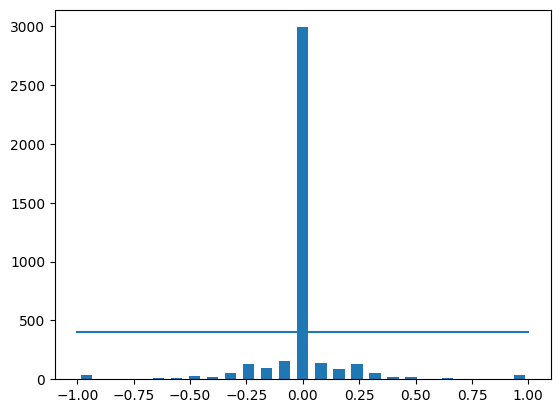

In [31]:
num_bins=25
samples_per_bin=400
hist, bins=np.histogram(data['steering'], num_bins)
center=(bins[:-1]+bins[1:])*0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])),(samples_per_bin, samples_per_bin))

In [32]:
print(data.shape)

(4053, 7)


In [33]:
remove_list=[]
for j in range(num_bins):
  list_=[]
  for i in range( len(data['steering'])):
    if data['steering'][i]>= bins[j] and data['steering'][i]<=bins[j+1]:
      list_.append(i)
  list_=shuffle(list_)
  list_=list_[samples_per_bin:]
  remove_list.extend(list_)
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 2590
remaining: 1463


# New section

<BarContainer object of 25 artists>

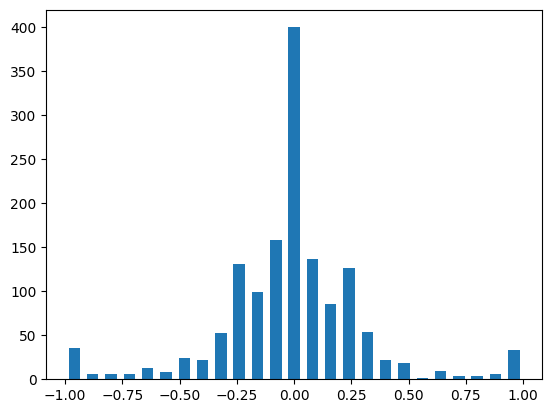

In [34]:
hist, bins=np.histogram(data['steering'], num_bins)
center=(bins[:-1]+bins[1:])*0.5
plt.bar(center, hist, width=0.05)

In [35]:
def load_img_steering(datadir, df):
  image_path = []
  steering= []
  for i in range(len(data)):
    indexed_data=data.iloc[i]# taking one row from the data
    center, left, right= indexed_data[0], indexed_data[1], indexed_data[2]# assigningcenter , left and right images
    image_path.append(os.path.join(datadir, center.strip()))# appending the center image into the list named image_path
    steering.append(float(indexed_data[3]))
    #left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3] +0.15))
    #right image append
    image_path.append(os.path.join(datadir, right.strip()))
    steering.append(float(indexed_data[3]-0.15))
  image_paths= np.asarray(image_path)
  steerings=np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering(datadir+'/IMG', data)



In [36]:
print(len(image_paths))
print(len(steerings))


4389
4389


In [37]:
x_train, x_valid, y_train, y_valid= train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('training Samples: {}\nValid Samples : {}'.format(len(x_train), len(x_valid)))

training Samples: 3511
Valid Samples : 878


Augmentation of data


In [38]:
# defining the zoom function
def zoom(image):
  zoom=iaa.Affine(scale=(1,1.3)) # SPECIFYING THE SCALE FO THE ZOOM
  image=zoom.augment_image(image) # applying the zoom on the image
  return image    # returning the image



Text(0.5, 1.0, 'zoomed image')

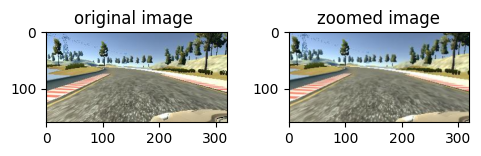

In [39]:
image= image_paths[random.randint(0,1000)]
original_image= plt.imread(image)
zoomed_image=zoom(original_image)
fig, axs = plt.subplots(1,2, figsize=(5, 5))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("original image ")
axs[1].imshow(zoomed_image)
axs[1].set_title("zoomed image")



In [60]:
def pan(image):
  pan=iaa.Affine(translate_percent={"x": (-0.1,0.1), "y": (-0.1,0.1)})
  image= pan.augment_image(image)
  return image


Text(0.5, 1.0, 'panned image')

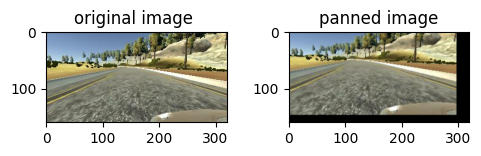

In [61]:
image= image_paths[random.randint(0,1000)]
original_image= plt.imread(image)
panned_image=pan(original_image)
fig, axs = plt.subplots(1,2, figsize=(5, 5))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("original image ")
axs[1].imshow(panned_image)
axs[1].set_title("panned image")

In [67]:
def img_brightness(image):
  bright=iaa.Multiply((0.2,1.2))
  image=bright.augment_image(image)
  return image

Text(0.5, 1.0, 'image with brightness')

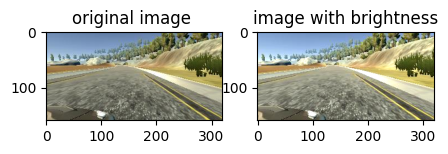

In [73]:
image=image_paths[(random.randint(0,1000))]
original_image=plt.imread(image)
bright_image=img_brightness(original_image)
fig, axs=plt.subplots(1,2,figsize=(5,5))
axs[0].imshow(original_image)
axs[0].set_title("original image ")
axs[1].imshow(bright_image)
axs[1].set_title("image with brightness")

Text(0.5, 1.0, 'image with brightness steering angle:0.2202122')

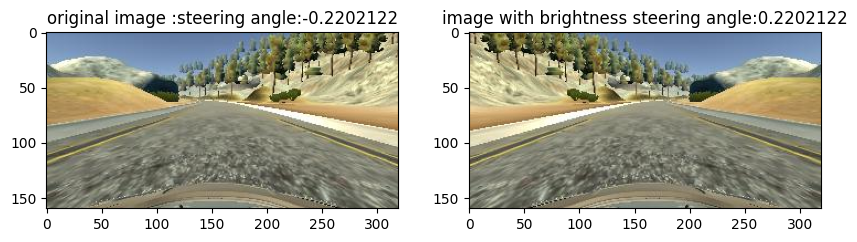

In [81]:
def image_flip(image, steering_angle):
  image= cv2.flip(image,1)# the number one is for horizontal flipping
  steering_angle=-steering_angle
  return image, steering_angle
indx= random.randint(0,1000)
image=image_paths[indx]
steering_angle=steerings[indx]
original_image=plt.imread(image)
flipped_image, steer =image_flip(original_image,steering_angle )
fig, axs=plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(original_image)
axs[0].set_title("original image :" + "steering angle:" + str(steering_angle))
axs[1].imshow(flipped_image)
axs[1].set_title("image with brightness" + " steering angle:" + str(steer))

In [82]:
def random_augment(image, steering_angle):
  image=plt.imread(image)
  if np.random.rand()<0.5:
    image=pan(image)
  if np.random.rand()<0.5:
    image=zoom(image)
  if np.random.rand()< 0.5:
    image=img_brightness(image)
  if np.random.rand()< 0.5:
    image,steer = image_flip(image, steering_angle)
  return image , steer



In [83]:
def img_processing(image):
  image=image[60:135,:,:]
  image=cv2.cvtColor(image,cv2.COLOR_RGB2YUV)
  image=cv2.GaussianBlur(image, (3,3), 0)
  image=cv2.resize(image, (200,66))
  image=image/255
  return image

(160, 320, 3)
(66, 200, 3)


Text(0.5, 1.0, ' image processed ')

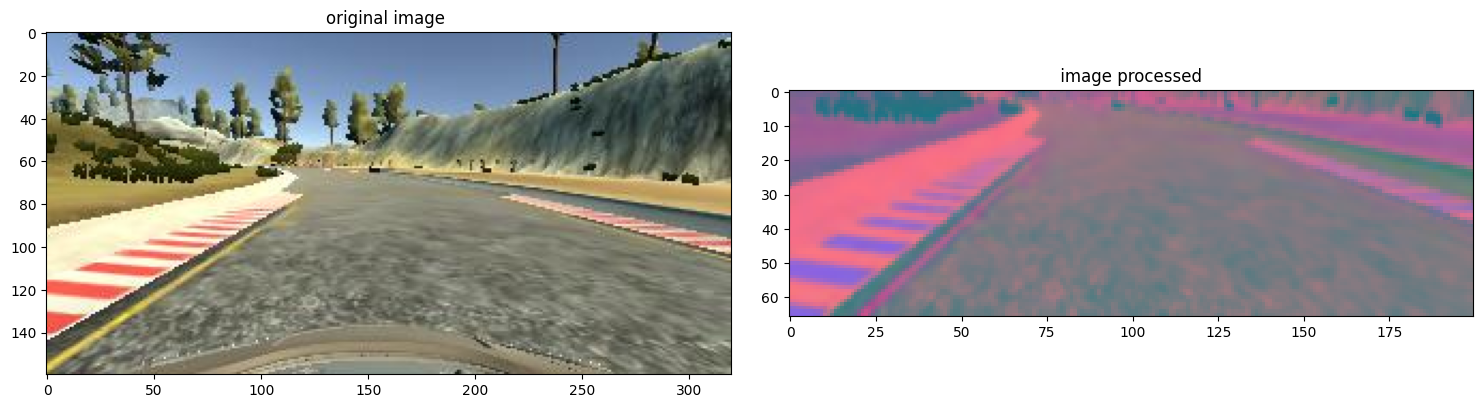

In [91]:
image1=image_paths[120]
image1=plt.imread(image1)
print(image1.shape)
processed_image=img_processing(image1)
print(processed_image.shape)
fig, axs= plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()

axs[0].imshow(image1)
axs[0].set_title("original image ")
axs[1].imshow(processed_image)
axs[1].set_title(" image processed ")
